# Exploration Data Analysis: 911 Emergency Calls

### Import python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data to pandas data frame

In [3]:
data = pd.read_csv('911.csv')

**---------------------------------------------------------------------------------------------------------------------------**
### Basic data checking usually includes the following:
* Check the first few rows of the data frame to see what are the columns
* Check the statistics of the numerical columns
* Check if any columns have NaN value or missing value

In [4]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [5]:
data['desc'][0]

'REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;'

In [6]:
data['desc'][300]

'RICES MILL RD & PANTHER RD; CHELTENHAM; 2015-12-11 @ 14:32:55;'

In [7]:
data.loc[300]

lat                                                    40.0865
lng                                                   -75.1574
desc         RICES MILL RD & PANTHER RD; CHELTENHAM; 2015-1...
zip                                                      19095
title                              Traffic: DISABLED VEHICLE -
timeStamp                                  2015-12-11 14:32:55
twp                                                 CHELTENHAM
addr                                RICES MILL RD & PANTHER RD
e                                                            1
Name: 300, dtype: object

In [8]:
data.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [9]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [11]:
data.info() # this method can also check null values of each column but less straightforward

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [10]:
data.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

<div class="alert alert-block alert-info">
<b><font size="4" face="Arial">Observations:</font></b>
    <li><font size="3" face = "Arial">
    This dataset includes event time (timeStamp), event location (lat, lng, zip, twp, addr), event type (title), and event description (desc)
    </font></li>
    <li><font size="3" face = "Arial">
    Column "e" is always 1 and not informative, and thus this column can be discarded
    </font></li>
    <li><font size="3" face = "Arial">
    There are wrong values in zip code since its min value is 4-digit
    </font></li>
    <li><font size="3" face = "Arial">
    There are missing values in columns "zip" and "twp"
    </font></li>
    <li><font size="3" face = "Arial">
    Column "timeStamp" is object time and it is better to convert it to datetime type
    </font></li>
    <li><font size="3" face = "Arial">
    It seems that the column 'desc" contains addr, twp, and time information. Will try to extract those information from "desc" and see if they are consistent with the content in existing "addr", "twp", and "time" columns.
    </font></li>
    <li><font size="3" face = "Arial">
    Column "title" has EMS, Fire, and Traffic as event type, are they the only 3 types in the datasets?
    </font></li>
</div>

What to do after loading the data?
* Is there any attribute need to change type?
* Do we want to add any attribute?
* Is there any non-useful attribute?
* What is the most possible type of emergency given a time and location

**---------------------------------------------------------------------------------------------------------------------------**
### Drop column e

In [12]:
data = data.drop(['e'], axis=1)

In [14]:
data.head() # to confirm that column "e" is dropped

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


**---------------------------------------------------------------------------------------------------------------------------**
### Convert timeStamp to datetime type

In [15]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [16]:
data.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
dtype: object

Create more date and time related columns

In [19]:
data['year'] = data['timeStamp'].apply(lambda time: time.year)
data['month'] = data['timeStamp'].apply(lambda time: time.month)
data['day'] = data['timeStamp'].apply(lambda time: time.day)
data['hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['minute'] = data['timeStamp'].apply(lambda time: time.minute)
data['second'] = data['timeStamp'].apply(lambda time: time.second)
data['dayofweek'] = data['timeStamp'].apply(lambda time: time.dayofweek) # Monday to Sunday: 0 to 6
data['date']= data['timeStamp'].dt.date

In [18]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,year,month,day,hour,minute,second,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,2015,12,10,17,10,52,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015,12,10,17,29,21,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,2015,12,10,14,39,21,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,2015,12,10,16,47,36,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015,12,10,16,56,52,3,2015-12-10


**---------------------------------------------------------------------------------------------------------------------------**
### The locations that have the most 911 calls

In [23]:
# Top 5 zip codes that have the most 911 calls
df_zip = pd.DataFrame(data['zip'].value_counts().head(5))
df_zip.rename(columns={'zip':'Top 5'},inplace=True)
df_zip.style.background_gradient(cmap='Blues')

,Top 5
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


In [24]:
df_twp = pd.DataFrame(data['twp'].value_counts().head(5))
df_twp.rename(columns={'twp':'Top 5'},inplace=True)
df_twp.style.background_gradient(cmap='Greens')

,Top 5
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


**---------------------------------------------------------------------------------------------------------------------------**
### Create new columns "reason" and "title_code" from column "title"

In [25]:
data['title'].nunique()

148

In [26]:
data['reason'] = data['title'].apply(lambda title: title.split(':')[0])
data['title_code'] = data['title'].apply(lambda title: title.split(':')[1])

In [29]:
data['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [28]:
data['title_code'].nunique()

95

In [30]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,year,month,day,hour,minute,second,dayofweek,date,reason,title_code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,2015,12,10,17,10,52,3,2015-12-10,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015,12,10,17,29,21,3,2015-12-10,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,2015,12,10,14,39,21,3,2015-12-10,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,2015,12,10,16,47,36,3,2015-12-10,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015,12,10,16,56,52,3,2015-12-10,EMS,DIZZINESS


In [31]:
pd_reason_count = pd.DataFrame(data['reason'].value_counts())
pd_reason_count

,reason
EMS,332692
Traffic,230208
Fire,100622


Text(0, 0.5, 'Counts')

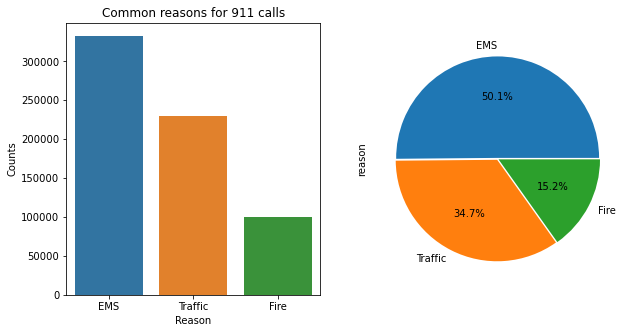

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
sns.countplot(x ='reason', data = data, order = data['reason'].value_counts().index, ax = axes[0])
# pd_reason_count.plot.pie(y='reason', ax = axes[1])
explode = (0.01,0.01,0.01)
data['reason'].value_counts().plot.pie(autopct = "%2.1f%%", ax=axes[1], explode = explode)

axes[0].set_title('Common reasons for 911 calls')
axes[0].set_xlabel('Reason')
axes[0].set_ylabel('Counts')

<div class="alert alert-block alert-info">
<b><font size="4" face="Arial">Observations:</font></b>
    <li><font size="3" face = "Arial">
    Almost half of the 911 calls are about EMS
    </font></li>
</div>

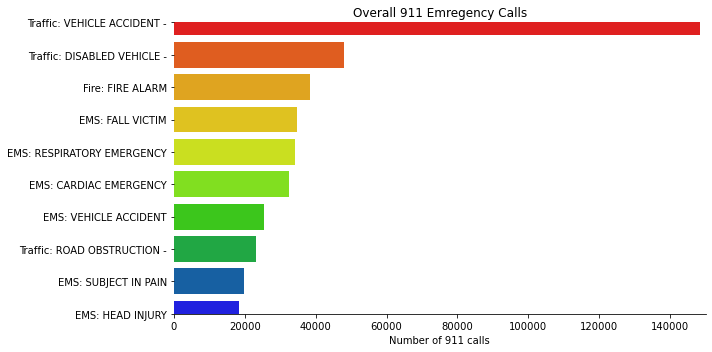

In [56]:
fig, ax = plt.subplots(figsize =(10, 5))
sns.countplot(y ='title', data = data, order = data['title'].value_counts().index, ax = ax, palette = 'prism')
sns.despine(bottom = False, left = True)
ax.set_ylim([9, 0])
ax.set_xlim([0, 150000])
ax.set(xlabel='Number of 911 calls',ylabel = '',title = 'Overall 911 Emregency Calls')
plt.tight_layout()

Text(0.5, 1.0, 'Traffic 911 calls')

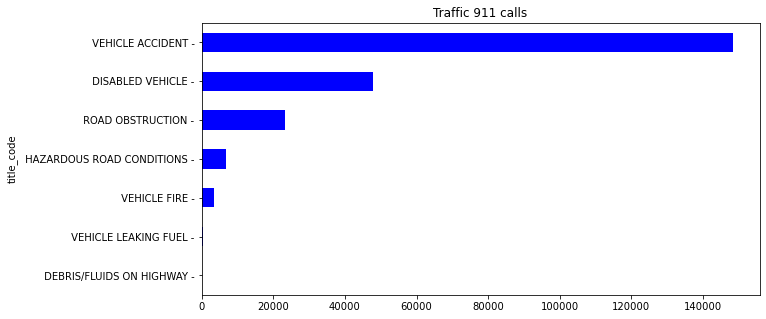

In [66]:
data[data['reason']=='Traffic'].groupby(['title_code']).count()['lat'].sort_values(ascending=True).plot(kind='barh',figsize=(10,5),color='b')
plt.title('Traffic 911 calls')

Text(0.5, 1.0, 'Fire 911 calls')

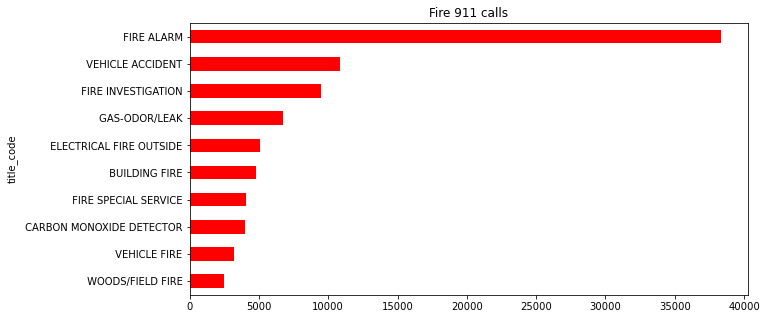

In [67]:
data[data['reason']=='Fire'].groupby(['title_code']).count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(10,5),color='r')
plt.title('Fire 911 calls')

Text(0.5, 1.0, 'EMS 911 calls')

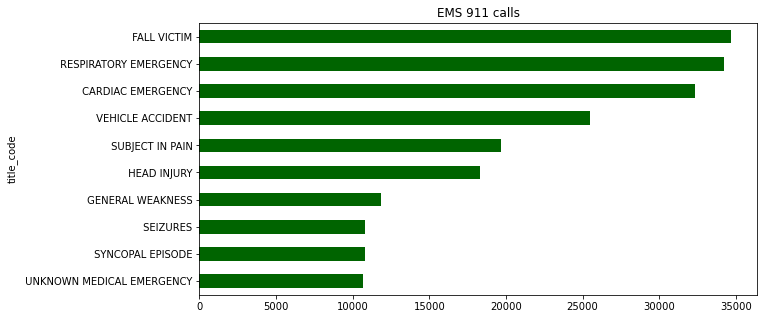

In [68]:
data[data['reason']=='EMS'].groupby(['title_code']).count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(10,5),color='darkgreen')
plt.title('EMS 911 calls')

<div class="alert alert-block alert-info">
<b><font size="4" face="Arial">Observations:</font></b>
    <li><font size="3" face = "Arial">
    We can see that the top 3 reasons of calls are "Traffic: Vehicle accident", "Traffic: disabled vehicle", and "Fire: fire alarm"
    </font></li>
    <li><font size="3" face = "Arial">
    EMS is not one of the top 3 reasons, is it because there are more subcategories of EMS than those of traffic and fire?
    </font></li>
</div>

In [63]:
data[data['reason']=='EMS']['title'].nunique()

81

In [64]:
data[data['reason']=='Traffic']['title'].nunique()

7

In [65]:
data[data['reason']=='Fire']['title'].nunique()

60

<div class="alert alert-block alert-info">
<b><font size="4" face="Arial">Observations:</font></b>
    <li><font size="3" face = "Arial">
    Our assumption seems to be true that there are more subcategories of EMS than those of traffic and fire
    </font></li>
    <li><font size="3" face = "Arial">
    Traffic has the least subcategories, which may also explain why the top 2 reasons of calls are about traffic
    </font></li>
</div>

**---------------------------------------------------------------------------------------------------------------------------**
### Zipcode level choropleth map

In [108]:
df_zip = pd.DataFrame(data['zip'].value_counts())
df_zip.rename_axis('zip',axis=1,inplace=True)
df_zip.rename(columns={'zip':'counts',},inplace=True)
df_zip.reset_index(inplace=True)
df_zip.rename(columns={'index':'zipcode',},inplace=True)
df_zip

zip,zipcode,counts
0,19401.0,45606
1,19464.0,43910
2,19403.0,34888
3,19446.0,32270
4,19406.0,22464
...,...,...
199,19457.0,1
200,18102.0,1
201,19543.0,1
202,19545.0,1


In [109]:
index_names = df_zip[ (df_zip['zipcode'] ==15301) | (df_zip['zipcode'] ==17810) | (df_zip['zipcode'] ==15090) | (df_zip['zipcode'] ==17331)].index
  
# drop these given row
# indexes from dataFrame
df_zip.drop(index_names, inplace = True)
df_zip.drop([203], axis = 0, inplace = True)
df_zip

zip,zipcode,counts
0,19401.0,45606
1,19464.0,43910
2,19403.0,34888
3,19446.0,32270
4,19406.0,22464
...,...,...
198,19456.0,1
199,19457.0,1
200,18102.0,1
201,19543.0,1


In [131]:
index_names = df_zip[ (df_zip['counts'] <=10)].index
df_zip.drop(index_names, inplace = True)
df_zip

zip,zipcode,counts
0,19401.0,45606
1,19464.0,43910
2,19403.0,34888
3,19446.0,32270
4,19406.0,22464
...,...,...
95,19380.0,14
96,19601.0,13
97,19107.0,12
98,19119.0,11


In [133]:
df_zip_ems = pd.DataFrame(data[data['reason']=='EMS']['zip'].value_counts())
df_zip_ems.rename_axis('zip',axis=1,inplace=True)
df_zip_ems.rename(columns={'zip':'counts',},inplace=True)
df_zip_ems.reset_index(inplace=True)
df_zip_ems.rename(columns={'index':'zipcode',},inplace=True)

index_names = df_zip_ems[ (df_zip_ems['counts'] <=10)].index
  
# drop these given row
# indexes from dataFrame
df_zip_ems.drop(index_names, inplace = True)
df_zip_ems

zip,zipcode,counts
0,19401.0,29601
1,19464.0,25989
2,19403.0,22408
3,19446.0,18322
4,19406.0,11778
...,...,...
83,19120.0,15
84,19116.0,13
85,19601.0,13
86,19490.0,13


In [134]:
df_zip_fire = pd.DataFrame(data[data['reason']=='Fire']['zip'].value_counts())
df_zip_fire.rename_axis('zip',axis=1,inplace=True)
df_zip_fire.rename(columns={'zip':'counts',},inplace=True)
df_zip_fire.reset_index(inplace=True)
df_zip_fire.rename(columns={'index':'zipcode',},inplace=True)

index_names = df_zip_fire[ (df_zip_fire['counts'] <=10)].index
  
# drop these given row
# indexes from dataFrame
df_zip_fire.drop(index_names, inplace = True)
df_zip_fire

zip,zipcode,counts
0,19464.0,7478
1,19401.0,6109
2,19446.0,4095
3,19406.0,3610
4,19403.0,3594
...,...,...
70,19505.0,14
71,19120.0,12
72,19474.0,11
73,19111.0,11


In [135]:
df_zip_traffic = pd.DataFrame(data[data['reason']=='Traffic']['zip'].value_counts())
df_zip_traffic.rename_axis('zip',axis=1,inplace=True)
df_zip_traffic.rename(columns={'zip':'counts',},inplace=True)
df_zip_traffic.reset_index(inplace=True)
df_zip_traffic.rename(columns={'index':'zipcode',},inplace=True)

index_names = df_zip_traffic[ (df_zip_traffic['counts'] <=10)].index
  
# drop these given row
# indexes from dataFrame
df_zip_traffic.drop(index_names, inplace = True)
df_zip_traffic

zip,zipcode,counts
0,19464.0,10443
1,19401.0,9896
2,19446.0,9853
3,19403.0,8886
4,19002.0,7877
...,...,...
81,19423.0,14
82,18944.0,14
83,19119.0,11
84,19107.0,11


<div class="alert alert-block alert-info">
<b><font size="4" face="Arial">Observations:</font></b>
    <li><font size="3" face = "Arial">
    zipcode 19401 and 19464 has most of the emergency calls, is it because they are more populated areas than other areas?
    </font></li>
</div>

**---------------------------------------------------------------------------------------------------------------------------**
### Emergency distribution by time attributes

In [214]:
day_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
data['dayofweek'] = data['dayofweek'].map(day_map)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,year,month,day,hour,minute,second,dayofweek,date,reason,title_code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,2015,12,10,17,10,52,Thu,2015-12-10,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015,12,10,17,29,21,Thu,2015-12-10,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,2015,12,10,14,39,21,Thu,2015-12-10,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,2015,12,10,16,47,36,Thu,2015-12-10,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015,12,10,16,56,52,Thu,2015-12-10,EMS,DIZZINESS


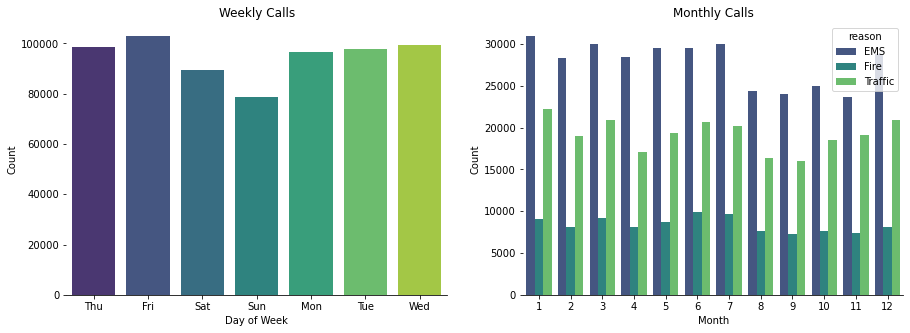

In [227]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='dayofweek',data=data, ax = ax[0], palette='viridis')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Count')
ax[0].set_title('Weekly Calls')

sns.countplot(x='month',data=data, ax = ax[1], palette='viridis',hue='reason')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')
ax[1].set_title('Monthly Calls')

sns.despine(left=True)